In [1]:
import csv
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def dataPreparation(path):
    ''' Prepares the data '''
    
    data = pandas.read_csv(path, header=None)
    print (data.head(),len(data))
    data = data[[1,2,3,4,5,6,7,8,9]]
    print (data.head())
    srcData = data.values.tolist()
    return srcData

In [3]:
path = '../data/bc.txt'
data = dataPreparation(path)

        0   1   2   3   4   5   6   7   8   9   10
0  1000025   5   1   1   1   2   1   3   1   1   2
1  1002945   5   4   4   5   7  10   3   2   1   2
2  1015425   3   1   1   1   2   2   3   1   1   2
3  1016277   6   8   8   1   3   4   3   7   1   2
4  1017023   4   1   1   3   2   1   3   1   1   2 699
   1  2  3  4  5   6  7  8  9
0  5  1  1  1  2   1  3  1  1
1  5  4  4  5  7  10  3  2  1
2  3  1  1  1  2   2  3  1  1
3  6  8  8  1  3   4  3  7  1
4  4  1  1  3  2   1  3  1  1


In [7]:
class KMeans:
    ''' Main KMeans class '''
    
    def __init__(self, K):
        ''' clusters : K x 9, numpy array of K clusters
            allocation : Dictionary of K keys
        '''
        self.K = K
        self.clusters = np.zeros(self.K)
        self.allocation = {}
        self.newAllocation = {}
        
    def initCentroidSelection(self, data):
        ''' Selects the initial K centroids 
            Any K datapoints is assumed to be the two initial clusters
        '''
        n_data = data.shape[0]
        initClusterIdx = np.random.choice(n_data, self.K)
        self.clusters = data[initClusterIdx]
        
    def calcDistance(self, X, Y):
        ''' Calculates the Eucleidian distance between two numpy arrays   
        '''
        distance = np.sqrt(np.sum((X-Y)**2,axis=1))
        return distance
    
    def handleEmptyCluster(self):
        ''' To handle empty cluster this following strategy have been taken
            1. drop the cluster
            2. break the cluster with most datapoints into two individual clusters
        '''        
        numDatapointPerCluster = [len(g) for g in self.newAllocation.values()]
        for cid,num in enumerate(numDatapointPerCluster):
            if num == 0:
                maxVal = max(numDatapointPerCluster)
                maxValIdx = [ cid for [cid,val] in enumerate(numDatapointPerCluster) if val==maxVal][0]
                idxx = maxVal // 2
                #Splitting the max allocated cluster into two halves
                temp = np.copy(self.newAllocation[maxValIdx][idxx:])
                self.newAllocation[cid] = np.copy(self.newAllocation[maxValIdx][0:(idxx)])
                self.newAllocation[maxValIdx] = np.copy(temp)
                numDatapointPerCluster = [len(g) for g in self.newAllocation.values()]

                
    def dataAllocationToClusters(self, data):
        ''' Allocates the datapoints to the respective clusters based on the Euclidean distance
        '''
        #copy new allocation to old allocation first
        if self.newAllocation:
            for clusterNum in range(self.K):
                self.allocation[clusterNum] = self.newAllocation[clusterNum]
        allDistFromEachCluster = []
        for eachCluster in self.clusters:
            distFromEachCluster = self.calcDistance(data, eachCluster)
            allDistFromEachCluster.append(distFromEachCluster)
        
        allDistFromEachCluster = np.array(allDistFromEachCluster)
        allocations = np.argmin(allDistFromEachCluster,axis=0)
        
        for i in range(self.K):
            dataIdxAllocated = np.where(allocations==i)
            # Keeps the index of data allocated to each cluster 
            self.newAllocation[i] = dataIdxAllocated[0]
            
        
#         for u in range(self.K):
#             print("Before handle:",len(self.newAllocation[u]))
        self.handleEmptyCluster()
#         for u in range(self.K):
#             print("After handle:",len(self.newAllocation[u]))

    def newClusterCreation(self, data):
        ''' Creates new K clusters based on previous allocations
            This is done by calculating mean of each allocated data points to each clusters
        '''
        
#         for u in range(self.K):
#             print("newCluster:",len(self.newAllocation[u]))
        newClusterList = []
        for eachCluster in range(self.K):
            #print(len(self.newAllocation[eachCluster]))
            dataPoints = data[self.newAllocation[eachCluster]]
            assert len(dataPoints) != 0
            newClusterList.append(np.mean(dataPoints,axis=0))
        self.clusters = np.array(newClusterList)
        
    def calcError(self):
        ''' Calculate errors between final clusters and datapoints
        '''
        totalDistance = 0
        for l in range(self.K):
            dataPoints = data[self.newAllocation[l]]
            dist = self.calcDistance(dataPoints,self.clusters[l])
            totalDistance += sum(dist)
            
        print("totalDistance:",totalDistance)
        return totalDistance
        
    def checkStopingCondition(self):
        ''' Checks if old and new allocations are same or different
        '''
        if (not self.allocation) or (not self.newAllocation):
            return False
        for l in range(self.K):
            if (set(list(self.allocation[l])) != set(list(self.newAllocation[l]))):
                return False
        return True
    
def visualization(loss):
    ''' Plots the data points with the centroids
    '''
    fig = plt.figure()
    ax = plt.axes()
    KList = loss.keys()
    L = loss.values()
    #print (KList, L)
    ax.plot(KList, L, label='Loss vs value',marker='o')
    plt.title("KMeans-Loss vs K")
    plt.legend()
    plt.xlabel("K")
    plt.ylabel("Loss")
    #fig.savefig("AccuracyVsK.png")
    plt.show()

K: 2
Iteration :  0
Iteration :  1
Iteration :  2
Iteration :  3
Iteration :  4
totalDistance: 3056.9660203490866
K: 3
Iteration :  0
Iteration :  1
Iteration :  2
Iteration :  3
Iteration :  4
Iteration :  5
Iteration :  6
Iteration :  7
Iteration :  8
Iteration :  9
Iteration :  10
Iteration :  11
Iteration :  12
Iteration :  13
Iteration :  14
Iteration :  15
Iteration :  16
Iteration :  17
totalDistance: 2842.7321769237783
K: 4
Iteration :  0
Iteration :  1
Iteration :  2
Iteration :  3
Iteration :  4
Iteration :  5
Iteration :  6
Iteration :  7
Iteration :  8
Iteration :  9
Iteration :  10
Iteration :  11
Iteration :  12
Iteration :  13
Iteration :  14
Iteration :  15
Iteration :  16
Iteration :  17
Iteration :  18
Iteration :  19
Iteration :  20
Iteration :  21
Iteration :  22
Iteration :  23
Iteration :  24
Iteration :  25
Iteration :  26
Iteration :  27
Iteration :  28
totalDistance: 2726.64049551244
K: 5
Iteration :  0
Iteration :  1
Iteration :  2
Iteration :  3
Iteration :  

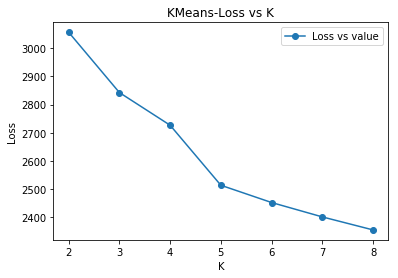

In [29]:
allK = [2, 3, 4, 5, 6, 7, 8]
loss = {}
for K in allK:
    print ("K:",K)
    kmeans = KMeans(K)
    data = np.array(data)
    n_data = data.shape[0]
    kmeans.initCentroidSelection(data)
    kmeans.dataAllocationToClusters(data)
    isDone = kmeans.checkStopingCondition()

    count = 0
    while(not isDone):
        print ("Iteration : ",count)
        count += 1
        kmeans.newClusterCreation(data)
        kmeans.dataAllocationToClusters(data)
        isDone = kmeans.checkStopingCondition()
    L = kmeans.calcError()
    loss[K] = L
    
visualization(loss)
    